# Proyecto de Marketing Bancario / Bank Marketing Project

---

## 📌 Introducción / Introduction

### 🧾 Versión en Español:
Predecir el comportamiento del cliente es una tarea fundamental en las estrategias modernas de marketing, especialmente en el sector bancario. Este proyecto se enfoca en construir un modelo predictivo para determinar si un cliente contratará un depósito a plazo, utilizando datos recolectados de campañas de marketing telefónicas previas realizadas por una institución bancaria portuguesa.

Mediante el análisis de estos datos históricos, buscamos identificar los factores que influyen en la decisión del cliente y desarrollar un modelo de aprendizaje automático que pueda ayudar a los bancos a optimizar futuras campañas de marketing.

### 🧾 English Version:
Predicting customer behavior is a crucial task in modern marketing strategies, especially in the banking sector. This project focuses on building a predictive model to determine whether a customer will subscribe to a term deposit, based on data collected from previous marketing campaigns carried out by a Portuguese banking institution.

By analyzing historical data from direct phone call campaigns, we aim to gain insights into the factors influencing customer decisions and to develop a machine learning model that can assist banks in optimizing future marketing efforts.

---

## 🎯 Objetivos / Objectives

### 🧾 Versión en Español:
- Explorar y comprender la estructura y el contenido del conjunto de datos.
- Realizar el preprocesamiento de datos, incluyendo el tratamiento de variables categóricas y valores faltantes.
- Llevar a cabo un análisis exploratorio de datos (EDA) para identificar patrones y correlaciones.
- Construir y evaluar modelos predictivos que clasifiquen si un cliente contratará o no un depósito a plazo (`yes` o `no`).
- Interpretar los resultados del modelo e identificar las características más influyentes.

### 🧾 English Version:
- Explore and understand the structure and content of the dataset.
- Perform data preprocessing, including handling categorical features and missing values.
- Conduct exploratory data analysis (EDA) to identify patterns and correlations.
- Build and evaluate predictive models to classify whether a client will subscribe to a term deposit (`yes` or `no`).
- Interpret model results and identify the most influential features.

---

## 📊 Descripción del Conjunto de Datos / Dataset Description

### 🧾 Versión en Español:
El conjunto de datos utilizado en este proyecto es el [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) del repositorio UCI Machine Learning. Contiene información relacionada con campañas de marketing directo (llamadas telefónicas) realizadas por una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente contratará un depósito a plazo (`y`).

- **Número de instancias:** 45,211  
- **Número de atributos:** 17 variables de entrada + 1 variable objetivo

#### 🔑 Características

**Información del Cliente:**
- `age`: Edad del cliente (numérica)
- `job`: Tipo de trabajo (categórica)
- `marital`: Estado civil (categórica)
- `education`: Nivel educativo (categórica)
- `default`: ¿Tiene crédito en mora? (binaria)
- `balance`: Saldo promedio anual en euros (numérica)
- `housing`: ¿Tiene préstamo hipotecario? (binaria)
- `loan`: ¿Tiene préstamo personal? (binaria)

**Información del Contacto:**
- `contact`: Tipo de comunicación utilizada (categórica: "cellular", "telephone")
- `day`: Día del último contacto en el mes (numérica)
- `month`: Mes del último contacto en el año (categórica)
- `duration`: Duración del último contacto en segundos (numérica)

**Información de la Campaña:**
- `campaign`: Número de contactos durante esta campaña (numérica)
- `pdays`: Días desde el último contacto previo (numérica, -1 significa que no fue contactado antes)
- `previous`: Número de contactos realizados antes de esta campaña (numérica)
- `poutcome`: Resultado de la campaña anterior (categórica)

#### 🎯 Variable Objetivo:
- `y`: ¿El cliente contrató un depósito a plazo? (binaria: `yes`, `no`)

> ⚠️ **Nota:** La variable `duration` está altamente correlacionada con la variable objetivo y debe tratarse con cuidado para evitar **fugas de información** (data leakage).

---

### 🧾 English Version:
The dataset used in this project is the [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) from the UCI Machine Learning Repository. It contains data related to direct marketing campaigns (phone calls) carried out by a Portuguese banking institution. The classification goal is to predict whether the client will subscribe to a term deposit (`y`).

- **Number of instances:** 45,211  
- **Number of attributes:** 17 input features + 1 target variable

#### 🔑 Features

**Client Information:**
- `age`: Age of the client (numeric)
- `job`: Type of job (categorical)
- `marital`: Marital status (categorical)
- `education`: Education level (categorical)
- `default`: Has credit in default? (binary)
- `balance`: Average yearly balance in euros (numeric)
- `housing`: Has housing loan? (binary)
- `loan`: Has personal loan? (binary)

**Contact Information:**
- `contact`: Contact communication type (categorical: "cellular", "telephone")
- `day`: Last contact day of the month (numeric)
- `month`: Last contact month of the year (categorical)
- `duration`: Last contact duration in seconds (numeric)

**Campaign Information:**
- `campaign`: Number of contacts performed during this campaign (numeric)
- `pdays`: Number of days since the client was last contacted (numeric, -1 means never contacted)
- `previous`: Number of contacts performed before this campaign (numeric)
- `poutcome`: Outcome of the previous marketing campaign (categorical)

#### 🎯 Target Variable:
- `y`: Has the client subscribed to a term deposit? (binary: `yes`, `no`)

> ⚠️ **Note:** The `duration` variable is highly correlated with the target and should be handled carefully during training to avoid **data leakage**.

---

## 🛠️ Próximos Pasos / Next Steps

### 🧾 Versión en Español:
En las siguientes secciones, realizaremos el proceso de limpieza, exploración, modelado y evaluación de los datos para construir un sistema predictivo efectivo para la suscripción de depósitos a plazo.

### 🧾 English Version:
In the following sections, we will perform data cleaning, exploration, modeling, and evaluation to build an effective predictive system for term deposit subscription.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.utils import class_weight

In [2]:
# Load your DataFrame
df = pd.read_csv('datasets/bank-additional-full.csv', delimiter=';')
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

### Buscamos Datos faltantes

In [3]:
# Then count missing values again
missing_per_column = df.isnull().sum()
print(missing_per_column)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Buscamos qué variables son las que entregan mayor información (relación lineal entre el target y las demás variables)

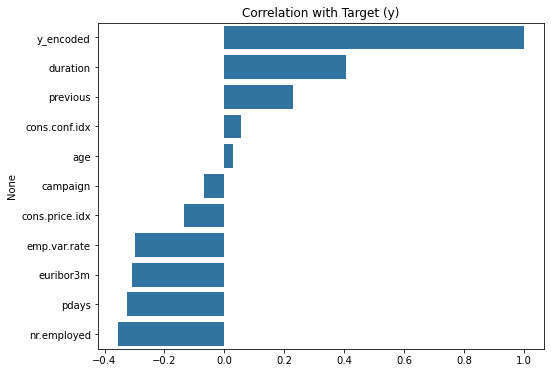

In [4]:
#determining linear relationship between y and numerical variables

# Encode the target
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})

# Select numeric features
numeric_cols = df.select_dtypes(include='number').columns

# Correlation matrix
correlations = df[numeric_cols].corrwith(df['y_encoded']).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Correlation with Target (y)")
plt.show()

El siguiente bloque de código calcula qué tan informativas son las variables para predecir la variable objetivo (y) usando información mutua (mutual information), y lo visualiza con un gráfico. Vamos paso por paso:

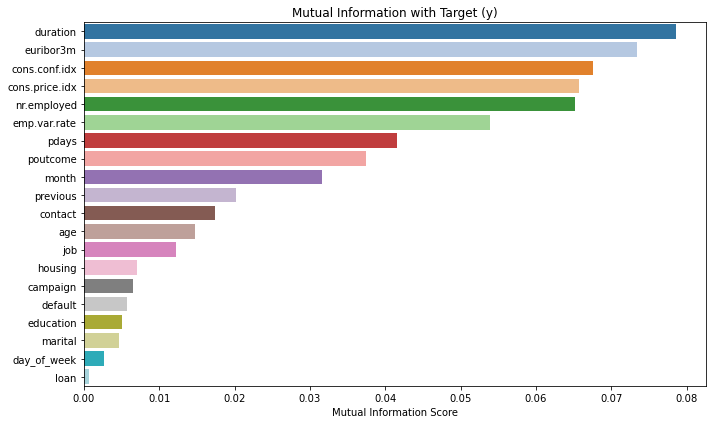

In [5]:
# First, convert categorical features using label encoding or keep as category dtype
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
    

# Calcular la información mutua
X = df_encoded.drop(columns=['y', 'y_encoded'])
y = df_encoded['y_encoded']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab20", len(mi_series))

sns.barplot(
    x=mi_series.values,
    y=mi_series.index,
    hue=mi_series.index,           # Solución sugerida
    dodge=False,
    palette=palette,
    legend=False                   # Ocultar leyenda innecesaria
)

plt.title("Mutual Information with Target (y)")
plt.xlabel("Mutual Information Score")
plt.ylabel("")  # Quitar etiqueta del eje Y
plt.tight_layout()
plt.show()

### Entrenamos el modelo de machine learning

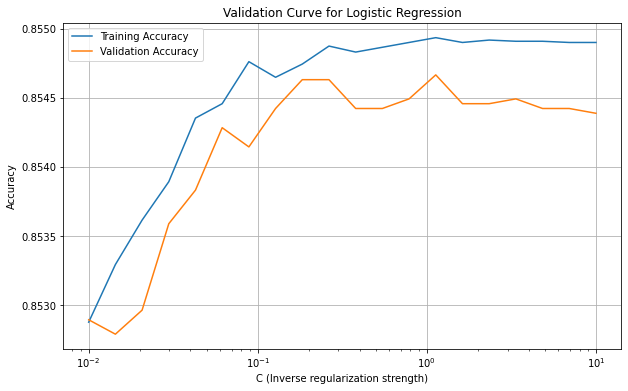

In [6]:
# Drop target column
X_all = df_encoded.drop(columns=['y', 'y_encoded'])
y = df_encoded['y_encoded']

X_temp, X_test, y_temp, y_test = train_test_split(X_all, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15/0.85, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Tomamos en cuenta el desbalance de datos
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))


# Parámetros para validation curve
param_range = np.logspace(-2, 1, 20)  # desde 0.01 hasta 10 en escala log

train_scores, val_scores = validation_curve(
    LogisticRegression(class_weight=class_weight_dict, penalty='l2', solver='lbfgs', max_iter=2000),
    X_train_scaled,
    y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10,6))
plt.semilogx(param_range, train_mean, label='Training Accuracy')
plt.semilogx(param_range, val_mean, label='Validation Accuracy')
plt.xlabel('C (Inverse regularization strength)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Define varios valores de hiperparámetros para probar
param_grid = {
    'C': [0.01, 0.1, 0.15, 1, 3 ,5, 7, 10],  # inverso de la regularización
    'penalty': ['l2'],        # regularización L2
    'solver': ['lbfgs']
}

best_acc = 0
best_params = None

for C in param_grid['C']:
    # Crear el modelo con el parámetro actual
    model = LogisticRegression(class_weight=class_weight_dict, C=C, penalty='l2', solver='lbfgs', max_iter=2000)
    model.fit(X_train_scaled, y_train)
    
    # Validar con el set de validación
    y_val_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    print(f"C={C} -> Validation Accuracy: {acc:.7f}")

    if acc > best_acc:
        best_acc = acc
        best_params = {'C': C}

print(f"\nMejores parámetros: {best_params}")
print(f"Mejor accuracy en validación: {best_acc:.4f}") 

C=0.01 -> Validation Accuracy: 0.8569348
C=0.1 -> Validation Accuracy: 0.8580676
C=0.15 -> Validation Accuracy: 0.8574203
C=1 -> Validation Accuracy: 0.8575821
C=3 -> Validation Accuracy: 0.8569348
C=5 -> Validation Accuracy: 0.8570966
C=7 -> Validation Accuracy: 0.8569348
C=10 -> Validation Accuracy: 0.8569348

Mejores parámetros: {'C': 0.1}
Mejor accuracy en validación: 0.8581


In [8]:
# Entrenar con los mejores parámetros usando todo el set train+val
X_train_val_scaled = np.vstack([X_train_scaled, X_val_scaled])
y_train_val = np.concatenate([y_train, y_val])

# Tomamos en cuenta el desbalance de datos
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_val),
    y=y_train_val
)
class_weight_final = dict(enumerate(class_weights))

final_model = LogisticRegression(class_weight=class_weight_final, C=best_params['C'], penalty='l2', solver='lbfgs', max_iter=2000)
final_model.fit(X_train_val_scaled, y_train_val)

# Evaluar con el set de test
y_test_pred = final_model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en test con modelo final: {test_acc:.4f}")

Accuracy en test con modelo final: 0.8539



--- Reporte de clasificación (test) ---
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5478
           1       0.43      0.89      0.58       701

    accuracy                           0.85      6179
   macro avg       0.71      0.87      0.75      6179
weighted avg       0.92      0.85      0.87      6179



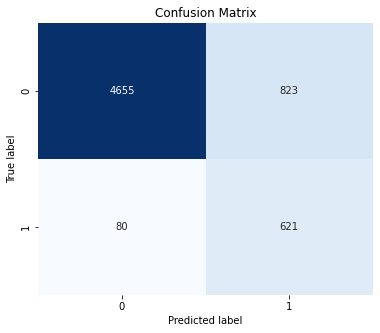

AUC en test: 0.9354


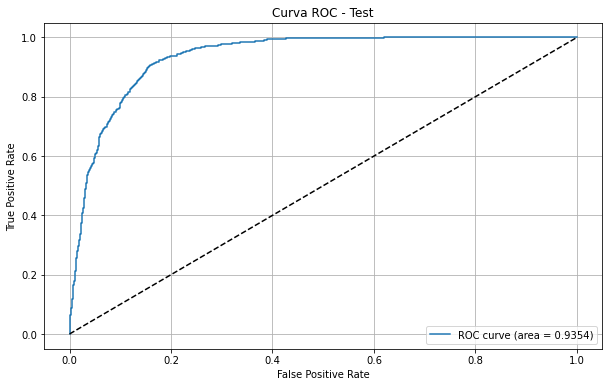

In [9]:
print("\n--- Reporte de clasificación (test) ---")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# La curva ROC y AUC
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_test_proba)
print(f"AUC en test: {auc:.4f}")

# Graficar ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### El modelo tiene una tasa alta de falsos negativos

Esto significa que clientes, que sí quieren una suscripción a plazo fijo, no serán contactados y por tanto representarán una gran pérdida para el banco.

El objetivo ahora es reducir la tasa de falsos negativos

Reporte de clasificación con umbral ajustado:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      5478
           1       0.35      0.95      0.51       701

    accuracy                           0.79      6179
   macro avg       0.67      0.86      0.69      6179
weighted avg       0.92      0.79      0.83      6179

Matriz de confusión:
[[4219 1259]
 [  32  669]]


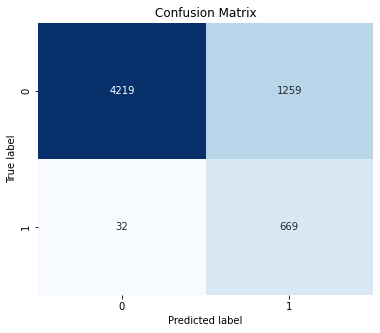

In [10]:
# Obtener probabilidades en lugar de predicciones binarias
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva

# Ajustar el umbral
umbral = 0.3  # Baja el umbral para aumentar recall y reducir falsos negativos
y_pred_ajustado = (y_probs >= umbral).astype(int)

# Ver métricas
print("Reporte de clasificación con umbral ajustado:")
print(classification_report(y_test, y_pred_ajustado))

# Ver matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_ajustado))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_ajustado)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Conclusiones / Conclusions

### Comments / Comentarios

**Modelo inicial**
- Verificamos qué variables afectan más al modelo, verificando relación lineal (para modelos como LogisticRegression) y no lineales para usar modelos que tomen en cuenta no linealidades.
- En este notebbok, usamos LogistiREgression, por lo que verificamos qué variables tienen correlación(linealidad) con el target  
- Debido al desbalance de datos (más negativos que positivos), se usó el metodo class_weights para tomar en cuenta esto e intentar no sesgar el modelo.  
- Nos referimos a umbral como el valor para el cual, los resultados por encima del mismo se toman como positivos.

**Initial Model**
- We examined which variables have the greatest impact on the model, checking linear relationships (for models such as Logistic Regression) and non-linear relationships for the potential use of models that account for non-linearities.
- In this notebook, we used Logistic Regression, so we specifically verified which variables have a linear correlation with the target.
- Due to the data imbalance (more negatives than positives), the class_weight method was applied to address this and avoid biasing the model.
- We refer to the threshold as the value above which results are classified as positives.

### Conclusiones generales / General Conclusions

**Español:**
- Balance inicial entre precisión y recall:
En el modelo original, con umbral estándar 0.5, se obtuvo un recall alto para la clase positiva (0.89) 89%, lo que indica que la mayoría de los clientes que realmente se suscriben fueron identificados. Sin embargo, la precisión para la clase positiva fue baja (0.43) 43%, lo que refleja un alto número de falsos positivos: clientes predichos como suscriptores pero que realmente no lo son.

- Falsos negativos relativamente bajos, pero mejorables:
La matriz de confusión inicial muestra 80 falsos negativos, es decir, clientes que querían suscribirse pero fueron clasificados erróneamente como no suscriptores. Esto representa una pérdida potencial de clientes valiosos para el banco.

- Efecto del ajuste del umbral a 0.3:
Al bajar el umbral de decisión a 0.3, se prioriza la reducción de falsos negativos, logrando reducirlos a 32. Esto mejora significativamente la sensibilidad o recall (de 0.89 a 0.95) para detectar clientes dispuestos a suscribirse, lo que es crucial para captar más clientes potenciales.

- Costos y trade-offs asociados:
La reducción de falsos negativos se logra a costa de aumentar falsos positivos, que pasan de 823 a 1259. Esto implica que el banco contactará a más clientes que no se suscribirán, incrementando el costo de campaña de captación de clientes. Además, la precisión para la clase positiva baja de 0.43 a 0.35, reflejando más "ruido" en las predicciones positivas.

- Impacto en métricas globales:
El accuracy total cae de 0.85 a 0.79, dado que el aumento de falsos positivos afecta la exactitud global. Sin embargo, el weighted average de precisión y recall sigue siendo alto (>0.8), lo que indica un buen desempeño balanceado considerando el desbalance de clases.


**English:**  
  
- Initial balance between precision and recall:
In the original model, with the standard threshold of 0.5, we achieved a high recall for the positive class (0.89 or 89%), indicating that most customers who actually subscribed were correctly identified. However, precision for the positive class was low (0.43 or 43%), reflecting a high number of false positives—customers predicted as subscribers who, in reality, are not.

- Relatively low but improvable false negatives:
The initial confusion matrix shows 80 false negatives, i.e., customers who intended to subscribe but were incorrectly classified as non-subscribers. This represents a potential loss of valuable customers for the bank.

- Effect of lowering the threshold to 0.3:
By reducing the decision threshold to 0.3, we prioritized lowering false negatives, reducing them from 80 to 32. This significantly improved sensitivity/recall (from 0.89 to 0.95) in detecting customers willing to subscribe, which is critical for capturing more potential clients.

- Costs and trade-offs involved:
The reduction in false negatives came at the cost of increasing false positives, which rose from 823 to 1259. This means the bank will contact more customers who will not subscribe, increasing customer acquisition campaign costs. In addition, precision for the positive class dropped from 0.43 to 0.35, reflecting more “noise” in positive predictions.

- Impact on overall metrics:
Overall accuracy dropped from 0.85 to 0.79, as the increase in false positives negatively affects global accuracy. However, the weighted average of precision and recall remains high (>0.8), indicating balanced performance given the class imbalance.

### Recomendaciones / Recommendations
- Según objetivos de negocio:
Dado que para la banca es más costoso perder clientes que potencialmente suscribirían (falsos negativos) que contactar clientes no interesados (falsos positivos), el ajuste del umbral a 0.3 es una estrategia adecuada. Permite maximizar la detección de clientes interesados (recall alto) a un costo manejable (costo de campaña de contacto a clientes).

- Pasos futuros:
Se recomienda evaluar el costo real asociado a falsos positivos vs falsos negativos para refinar aún más el umbral. También se sugiere implementar monitoreo en producción para ajustar el umbral dinámicamente según la respuesta del mercado y feedback de campañas.

- También se recomienda usar herramientas alternativas para manejar datos desbalanceados y mejorar la precisión.

**English**
- According to business objectives:
Since for banking it is more costly to lose customers who would potentially subscribe (false negatives) than to contact uninterested customers (false positives), lowering the threshold to 0.3 is an appropriate strategy. It maximizes the detection of interested customers (high recall) at a manageable cost (campaign contact costs).

- Next steps:
It is recommended to evaluate the actual cost associated with false positives vs. false negatives to further refine the threshold. Implementing monitoring in production is also suggested, so the threshold can be dynamically adjusted according to market response and campaign feedback.

- It is also recommended to explore alternative tools for handling imbalanced data and improving precision.